# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [134]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileName = "ainvert.py"
if not os.path.exists(fileName):
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

from ainvert import A_invert

In [135]:
import math

def bicubic(img, scale_y, scale_x):
    
    in_x, in_y = img.shape

    out_x, out_y = int(in_x * scale_x), int(in_y * scale_y)

    img_out = np.zeros((out_x, out_y))

    for x in range(out_x):
        for y in range(out_y):

            A_coords = (math.floor(x / scale_x), math.floor(y / scale_y))
            B_coords = (A_coords[0], min(A_coords[1] + 1, in_y - 1)) 
            C_coords = (min(A_coords[0] + 1, in_x - 1), min(A_coords[1] + 1, in_y - 1))
            D_coords = (min(A_coords[0] + 1, in_x - 1), A_coords[1])
            
            A = img[A_coords[0]][A_coords[1]]
            B = img[B_coords[0]][B_coords[1]]
            C = img[C_coords[0]][C_coords[1]]
            D = img[D_coords[0]][D_coords[1]]
            
            x_derivative = lambda c :  (img[min(c[0] + 1, in_x - 1)][c[1]].astype(int) - img[max(c[0] - 1, 0)][c[1]].astype(int)) / 2
            
            A_x = x_derivative(A_coords)
            B_x = x_derivative(B_coords)
            C_x = x_derivative(C_coords)
            D_x = x_derivative(D_coords)
            
            y_derivative = lambda c : (img[c[0]][min(c[1] + 1, in_y - 1)].astype(int) - img[c[0]][max(c[1] - 1, 0)].astype(int)) / 2
            
            A_y = y_derivative(A_coords)
            B_y = y_derivative(B_coords)
            C_y = y_derivative(C_coords)
            D_y = y_derivative(D_coords)
            
            xy_derivative = lambda c : (
                img[min(c[0] + 1, in_x - 1)][min(c[1] + 1, in_y - 1)].astype(int) -
                img[max(c[0] - 1, 0), c[1]].astype(int) - 
                img[c[0], max(c[1] - 1, 0)].astype(int) +
                img[c[0], c[1]].astype(int)
                ) / 4
            
            A_xy = xy_derivative(A_coords)
            B_xy = xy_derivative(B_coords)
            C_xy = xy_derivative(C_coords)
            D_xy = xy_derivative(D_coords)
            
            X = np.array([A, B, D, C, A_x, B_x, D_x, C_x, A_y, B_y, D_y, C_y, A_xy, B_xy, D_xy, C_xy]).transpose()

            a = A_invert @ X

            a = a.reshape((4, 4))
            
            for i in range(4):
                for j in range(4):
                    img_out[x][y] += a[i][j] * (((x / scale_x) - A_coords[0]) ** i) * (((y / scale_y) - A_coords[1]) ** j)

    return img_out

In [136]:
def plot_image(img_to_show, title, factor):
    plt.figure(figsize=(img_to_show.shape[0]/factor, img_to_show.shape[1]/factor), dpi=200)
    plt.imshow(img_to_show, cmap ="gray")
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.title(title, fontsize=5)
    plt.show()
    
def test(algorithm, img, scale_x, scale_y, factor):
    I = cv2.imread(img)
    I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
    I_out = algorithm(np.copy(I), scale_x, scale_y)
    plot_image(I_out, f"Obrazek przeskalowany przez {scale_x}, {scale_y}", factor)
    

def multiple_test(algorithm, img, factor):

    scales = [(1.0, 1.0), (1.5, 1.5), (2.0, 2.0), (1.5, 2.5), (0.7, 0.7)]

    for scale in scales:
        test(algorithm, img, scale[0], scale[1], factor)

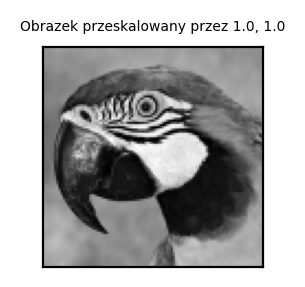

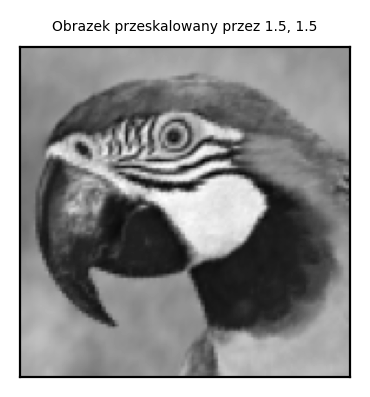

In [ ]:
multiple_test(bicubic, 'parrot.bmp', 70)

In [132]:
import math

def bicubic_ops(img, scale_y, scale_x):
    arithmetic_ops = 0
    memory_ops = 0
    
    in_x, in_y = img.shape

    out_x, out_y = int(in_x * scale_x), int(in_y * scale_y)
    
    arithmetic_ops += 2

    img_out = np.zeros((out_x, out_y))

    for x in range(out_x):
        for y in range(out_y):

            A_coords = (math.floor(x / scale_x), math.floor(y / scale_y))
            B_coords = (A_coords[0], min(A_coords[1] + 1, in_y - 1)) 
            C_coords = (min(A_coords[0] + 1, in_x - 1), min(A_coords[1] + 1, in_y - 1))
            D_coords = (min(A_coords[0] + 1, in_x - 1), A_coords[1])
            
            arithmetic_ops += 10 
            memory_ops += 6
            
            A = img[A_coords[0]][A_coords[1]]
            B = img[B_coords[0]][B_coords[1]]
            C = img[C_coords[0]][C_coords[1]]
            D = img[D_coords[0]][D_coords[1]]
            
            memory_ops += 4 * 2
            
            x_derivative = lambda c :  (img[min(c[0] + 1, in_x - 1)][c[1]].astype(int) - img[max(c[0] - 1, 0)][c[1]].astype(int)) / 2
            
            A_x = x_derivative(A_coords)
            B_x = x_derivative(B_coords)
            C_x = x_derivative(C_coords)
            D_x = x_derivative(D_coords)
            
            arithmetic_ops += 4 * 4
            memory_ops += 6 * 4
            
            y_derivative = lambda c : (img[c[0]][min(c[1] + 1, in_y - 1)].astype(int) - img[c[0]][max(c[1] - 1, 0)].astype(int)) / 2
            
            A_y = y_derivative(A_coords)
            B_y = y_derivative(B_coords)
            C_y = y_derivative(C_coords)
            D_y = y_derivative(D_coords)
            
            arithmetic_ops += 4 * 4
            memory_ops += 6 * 4
            
            xy_derivative = lambda c : (
                img[min(c[0] + 1, in_x - 1)][min(c[1] + 1, in_y - 1)].astype(int) -
                img[max(c[0] - 1, 0), c[1]].astype(int) - 
                img[c[0], max(c[1] - 1, 0)].astype(int) +
                img[c[0], c[1]].astype(int)
                ) / 4
            
            A_xy = xy_derivative(A_coords)
            B_xy = xy_derivative(B_coords)
            C_xy = xy_derivative(C_coords)
            D_xy = xy_derivative(D_coords)
            
            arithmetic_ops += 7 * 4
            memory_ops += 12 * 4
            
            X = np.array([A, B, D, C, A_x, B_x, D_x, C_x, A_y, B_y, D_y, C_y, A_xy, B_xy, D_xy, C_xy]).transpose()

            a = A_invert @ X
            
            arithmetic_ops += 16 * 16 * 2

            a = a.reshape((4, 4))
            
            for i in range(4):
                for j in range(4):
                    img_out[x][y] += a[i][j] * (((x / scale_x) - A_coords[0]) ** i) * (((y / scale_y) - A_coords[1]) ** j)
                    arithmetic_ops += 9
                    memory_ops += 4

    return img_out, arithmetic_ops, memory_ops

def bilinear_ops(img, scale_y, scale_x):

    arithmetic_ops = 0
    memory_ops = 0

    in_x, in_y = img.shape

    out_x, out_y = int(in_x * scale_x), int(in_y * scale_y)
    
    arithmetic_ops +=2

    img_out = np.zeros((out_x, out_y))

    for x in range(out_x):
        for y in range(out_y):

            A_x = math.floor(x / scale_x)
            A_y = math.floor(y / scale_y)
            
            arithmetic_ops += 2
            
            D_x = A_x
            D_y = min(A_y + 1, in_y - 1)
            
            arithmetic_ops += 2
            
            C_x = min(A_x + 1, in_x - 1)
            C_y = min(A_y + 1, in_y - 1)
            
            arithmetic_ops += 4
            
            B_x = min(A_x + 1, in_x - 1)
            B_y = A_y
            
            arithmetic_ops += 2

            matrix_adbc = np.array([[img[A_x][A_y], img[D_x][D_y]],
                                    [img[B_x][B_y], img[C_x][C_y]]])
            
            memory_ops += 4
            
            x_fraction = (x / scale_x) - A_x
            y_fraction = (y / scale_y) - A_y

            arithmetic_ops += 4

            first_matrix = np.array([1 - x_fraction, x_fraction])
            third_matrix = np.array([1 - y_fraction, y_fraction]).transpose()
            
            arithmetic_ops += 2

            result = first_matrix @ matrix_adbc @ third_matrix
            
            arithmetic_ops += 8
            
            img_out[x][y] = result
            
            memory_ops += 1

    return img_out, arithmetic_ops, memory_ops

In [ ]:
I = cv2.imread('parrot.bmp')
I = cv2.cvtColor(np.copy(I), cv2.COLOR_BGR2GRAY)
I_out, arithmetic_bicubic, memory_bicubic = bicubic_ops(np.copy(I), 2.0, 2.0)
I_out, arithmetic_bilinear, memory_bilinear = bilinear_ops(np.copy(I), 2.0, 2.0)

print("Bilinear: ", arithmetic_bilinear, memory_bilinear)
print("Bicubic: ", arithmetic_bicubic, memory_bicubic)

Bilinear:  960002 200000
Bicubic:  29040002 6960000


Jak widać interpolacja dwusześcienna wykonuje znacznie więcej opracji arytmetycznych oraz odczytów pamięci